<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Danial Ayati

**Student ID**: 99101246

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [34]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

X_train = np.load('/Users/danial/Desktop/Term 6/IML - Dr. Amini/HWs/CHWs/IML-CHW2/q2-train.npy')[:,0].reshape(-1, 1)
Y_train = np.load('/Users/danial/Desktop/Term 6/IML - Dr. Amini/HWs/CHWs/IML-CHW2/q2-train.npy')[:,1].reshape(-1, 1)

X_test = np.load('/Users/danial/Desktop/Term 6/IML - Dr. Amini/HWs/CHWs/IML-CHW2/q2-test.npy')[:,0].reshape(-1, 1)
Y_test = np.load('/Users/danial/Desktop/Term 6/IML - Dr. Amini/HWs/CHWs/IML-CHW2/q2-test.npy')[:,1].reshape(-1, 1)

X_val = np.load('/Users/danial/Desktop/Term 6/IML - Dr. Amini/HWs/CHWs/IML-CHW2/q2-valid.npy')[:,0].reshape(-1, 1)
Y_val = np.load('/Users/danial/Desktop/Term 6/IML - Dr. Amini/HWs/CHWs/IML-CHW2/q2-valid.npy')[:,1].reshape(-1, 1)

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [58]:
def create_matrix(X, k):
    
    new_X = None

    new_X = [np.power(X, i) for i in range(0, k+1)]
    new_X = np.array(new_X).T
    new_X = new_X.reshape(-1, k+1)
    
    return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [59]:
# If you need any other function for training write it here
# (like gradient descent or anything else)

In [60]:
def loss(X, Y, w):
    m, n = X.shape
    loss = np.sum(np.square(X @ w - Y)) / m
    return loss.item()

In [61]:
def direct_method(X, Y):
    w = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w

In [62]:
def train(X_train, Y_train, X_val, Y_val, k):
    
    X_train_matrix = create_matrix(X_train, k)
    X_val_matrix = create_matrix(X_val, k)
    
    w = direct_method(X_train_matrix, Y_train)
    
    loss_train = loss(X_train_matrix, Y_train, w)
    loss_val = loss(X_val_matrix, Y_val, w)
    
    return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: The impact of the polynomial degree, represented by the variable k, on the model's performance can be evaluated by analyzing the loss on both the training and validation sets.

For small values of k (e.g., k=1), the model is too simplistic to capture the underlying relationship between the input variable (x) and the output variable (y). Consequently, the model exhibits high loss on both the training and validation sets, indicating underfitting. Underfitting occurs when the model lacks the complexity to capture the patterns and variations in the data.

As k increases, the model's complexity grows, allowing it to better fit the training data. The loss on the training set gradually decreases as the model becomes more expressive. However, if k becomes excessively large, the model may overfit the training data. Overfitting happens when the model becomes too sensitive to the noise and idiosyncrasies of the training set, leading to poor performance on unseen data. In this case, the training loss will continue to decrease while the validation loss starts to rise.

By plotting the loss on the training and validation sets against different values of k, we can observe a U-shaped curve. Initially, both losses decrease as k increases, reflecting the model's improved capability to fit the training data. However, after reaching a certain point, the validation loss begins to increase while the training loss keeps decreasing. The optimal value of k corresponds to the minimum point of the validation loss. It signifies the best trade-off between model complexity and generalization, achieving the optimal balance between underfitting and overfitting.

Therefore, by analyzing the plot of the loss on the training and validation sets as a function of k, we can determine the optimal value of k that minimizes the validation loss, indicating the most suitable model complexity for the given data.

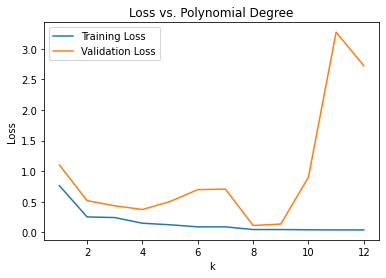

In [65]:
k_values = range(1, 13)
loss_train_list = []
loss_val_list = []

for k in k_values:
    w, loss_train, loss_val = train(X_train, Y_train, X_val, Y_val, k)
    loss_train_list.append(loss_train)
    loss_val_list.append(loss_val)

plt.plot(k_values, loss_train_list, label='Training Loss')
plt.plot(k_values, loss_val_list, label='Validation Loss')
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Loss vs. Polynomial Degree')
plt.legend()
plt.show()


## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**:

In [66]:
k_best = 8
w, train_loss, val_loss = train(X_train, Y_train, X_val, Y_val, k_best)

X_test_new = create_matrix(X_test, k_best)

test_loss = loss(X_test_new, Y_test, w)

print("Test Loss:", test_loss)


Test Loss: 0.11791424797290265
